In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
import re 

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('/Users/kelvinfoo/Desktop/AI Masters/TripAdvisor NLP/Data/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
print(f"Number of reviews: {df.shape[0]}")

Number of reviews: 20491


### **Distribution of Review Ratings**

[Text(0, 0, '1421'),
 Text(0, 0, '1793'),
 Text(0, 0, '2184'),
 Text(0, 0, '6039'),
 Text(0, 0, '9054')]

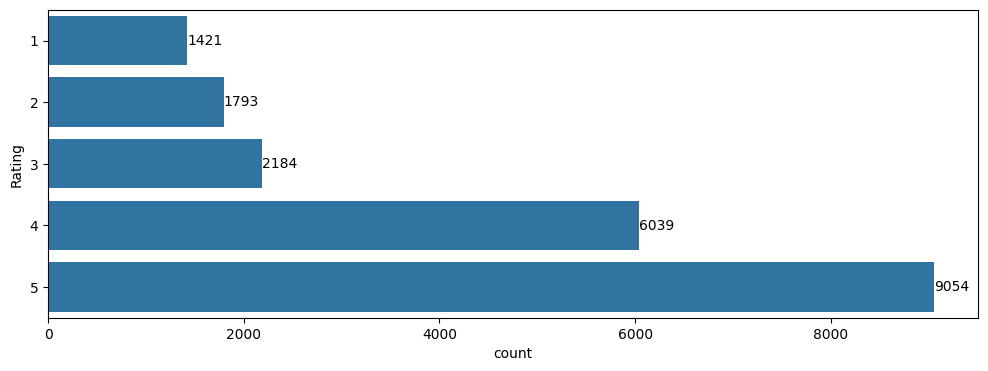

In [9]:
plt.figure(figsize = (12,4))
ax = sns.countplot(y = df['Rating'])
abs_value = df['Rating'].value_counts(ascending = True).values
ax.bar_label(container = ax.containers[0], labels = abs_value)

### **Distribution of Review Ratings**

In [ ]:
df['review_length'] = df['Review'].str.split().str.len() #Splits the text by whitspace and each chunk seperated by whitespace is counted as one word 
print(f"Minimum review length: {min(df['review_length'])}")
print(f"Maximum review length: {max(df['review_length'])}")

Minimum review length: 7
Maximum review length: 1931


<Axes: xlabel='review_length', ylabel='Count'>

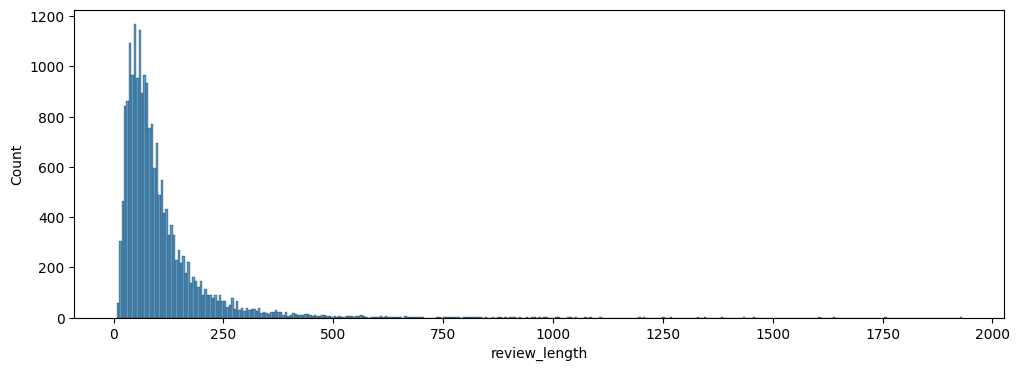

In [21]:
plt.figure(figsize = (12,4))
sns.histplot(x = 'review_length', data = df)

### **Most Common n-grams**

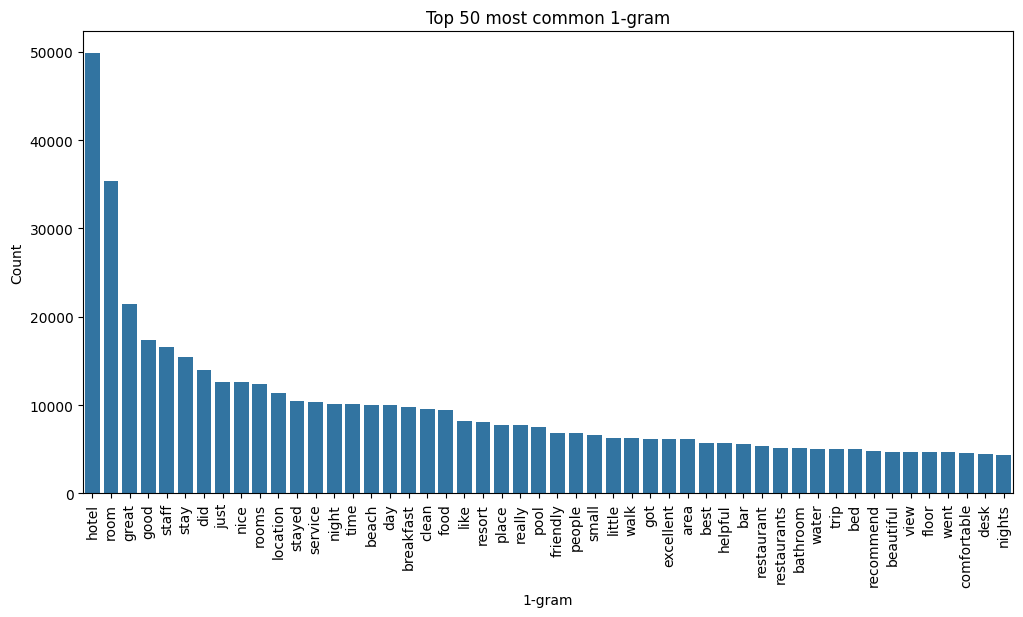

In [35]:
# 1-gram with removal of stop words 
vectorizer = CountVectorizer(ngram_range = (1,1), stop_words = 'english')
sum_1gram = vectorizer.fit_transform(df['Review']).sum(axis = 0)
one_gram_count = [(word, sum_1gram[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
one_gram_count_df = pd.DataFrame(one_gram_count, columns = ['1-gram', 'Count']).sort_values(by = 'Count', ascending = False).head(50)

plt.figure(figsize = (12,6))
ax = sns.barplot(x='1-gram', y='Count', data = one_gram_count_df)
ax.set_title('Top 50 most common 1-gram')
ax.tick_params(axis = 'x', rotation = 90)

Text(0.5, 1.0, 'Top 30 most common 2-gram')

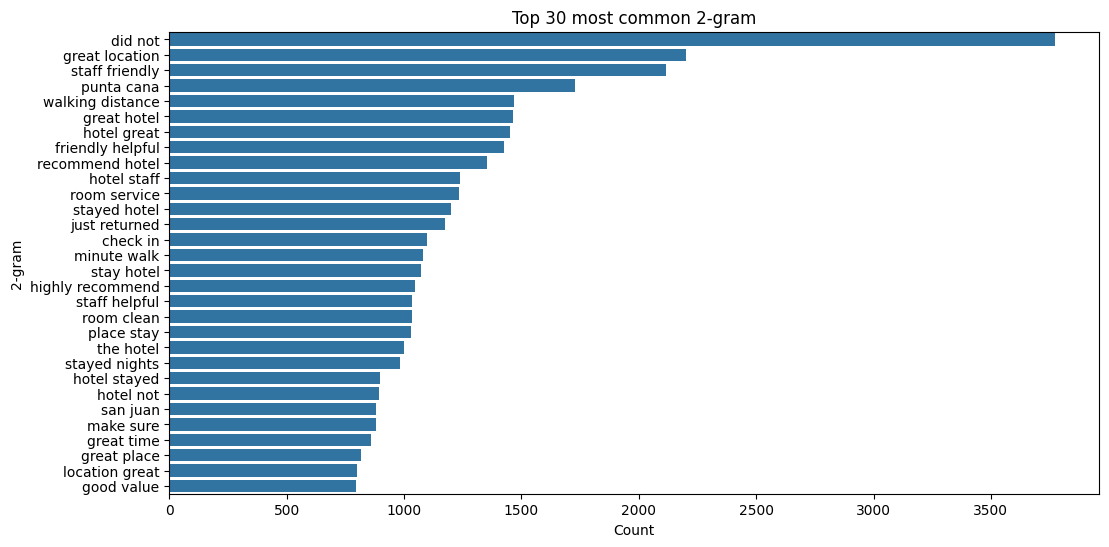

In [32]:
# 2-gram without removal of stop words 
vectorizer = CountVectorizer(ngram_range = (2,2))
sum_2gram = vectorizer.fit_transform(df['Review']).sum(axis = 0)
two_gram_count = [(word, sum_2gram[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
two_gram_count_df = pd.DataFrame(two_gram_count, columns = ['2-gram', 'Count']).sort_values(by = 'Count', ascending = False).head(30)

plt.figure(figsize = (12,6))
ax = sns.barplot(y='2-gram', x='Count', data = two_gram_count_df)
ax.set_title('Top 30 most common 2-gram')

Text(0.5, 1.0, 'Top 30 most common 3-gram')

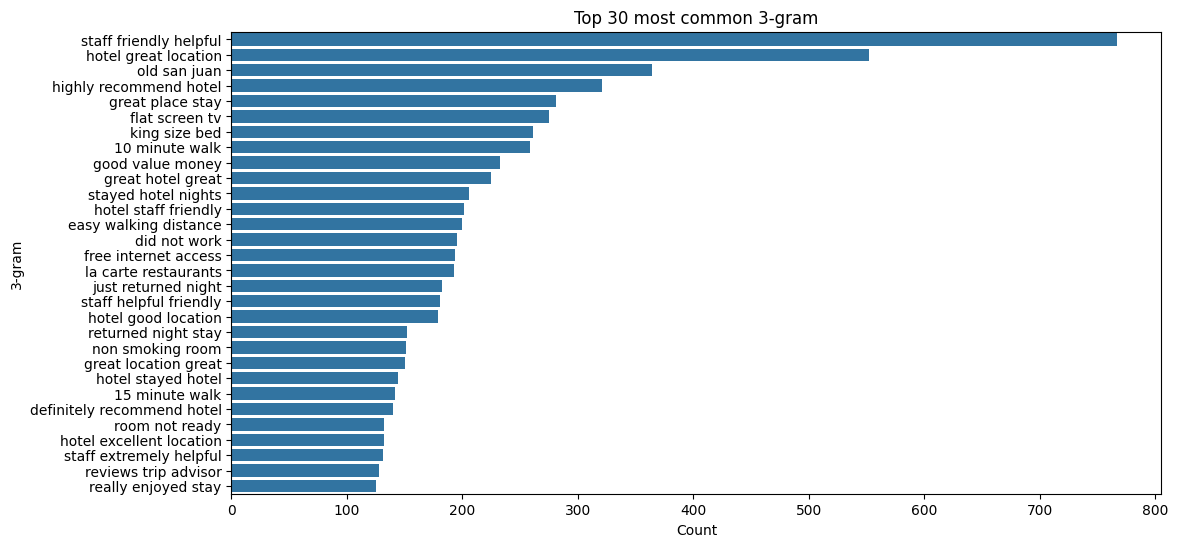

In [36]:
# 3-gram without removal of stop words 
vectorizer = CountVectorizer(ngram_range = (3,3))
sum_3gram = vectorizer.fit_transform(df['Review']).sum(axis = 0)
three_gram_count = [(word, sum_3gram[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
three_gram_count_df = pd.DataFrame(three_gram_count, columns = ['3-gram', 'Count']).sort_values(by = 'Count', ascending = False).head(30)

plt.figure(figsize = (12,6))
ax = sns.barplot(y='3-gram', x='Count', data = three_gram_count_df)
ax.set_title('Top 30 most common 3-gram')

### **Presence of emojis, @ and #**

In [ ]:
all_reviews = ''.join(df['Review'])
hashtags = re.findall(r'[#]\w+', all_reviews)
hashtag_counts = dict(Counter(hashtags))
print(hashtag_counts) # No words starting with #

{}


In [ ]:
mentions = re.findall(r'[@]\w+', all_reviews)
mention_counts = dict(Counter(mentions))
print(mention_counts) # No words starting with @ 

{}


In [ ]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)

emojis = emoji_pattern.findall(all_reviews)
emoji_count = dict(Counter(emojis))
print(emoji_count) # No emojis 

{}
